In [ ]:
# plt.clf
# for pp in range(3148):
# # for pp in range(8):
# #     print(pp)
#     ax = plt.axes()
#     plt.plot(local_test[pp,:],color = "black")
#     plt.yticks([])
#     plt.xticks([])
#     if y_test[pp] == 0:
#         ax.set_facecolor("red")
#     if y_test[pp] == 1:
#         ax.set_facecolor("blue")
#     plt.savefig("plots/lc" + str(pp) + ".png" )
# #     plt.show()
#     plt.clf
    

In [ ]:
model = tf.keras.models.load_model("conv_model")

In [ ]:
X = model.layers[-2].output
model2 = tf.keras.Model(inputs = (local_input,global_input),outputs = X)
model2.summary()

X = model2.predict((local_test,global_test))
y = y_test

In [298]:
X = local_test[1:1000]
y = y_test[1:1000]

In [303]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize = (18,12))
    ax = plt.subplot(111)
#     for i in range(X.shape[0]):
#         plt.text(X[i, 0], X[i, 1], str(y[i]),
#                  color=plt.cm.Set1(y[i]),
#                  fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
#         with open('Exoplanets/PC/0.json', 'r') as fp:
#             exo_dictionary = json.load(fp)
#         with "plots/lc" + str(pp) + ".png" as file:
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            arr_img = plt.imread("plots/lc" + str(i) + ".png")
            
            imagebox = offsetbox.AnnotationBbox(
#                 offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r)
                offsetbox.OffsetImage( arr_img , cmap=plt.cm.gray_r,zoom = .05)
                , X[i]
                , xybox= 1*X[i]
                , xycoords = 'data'
            )
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

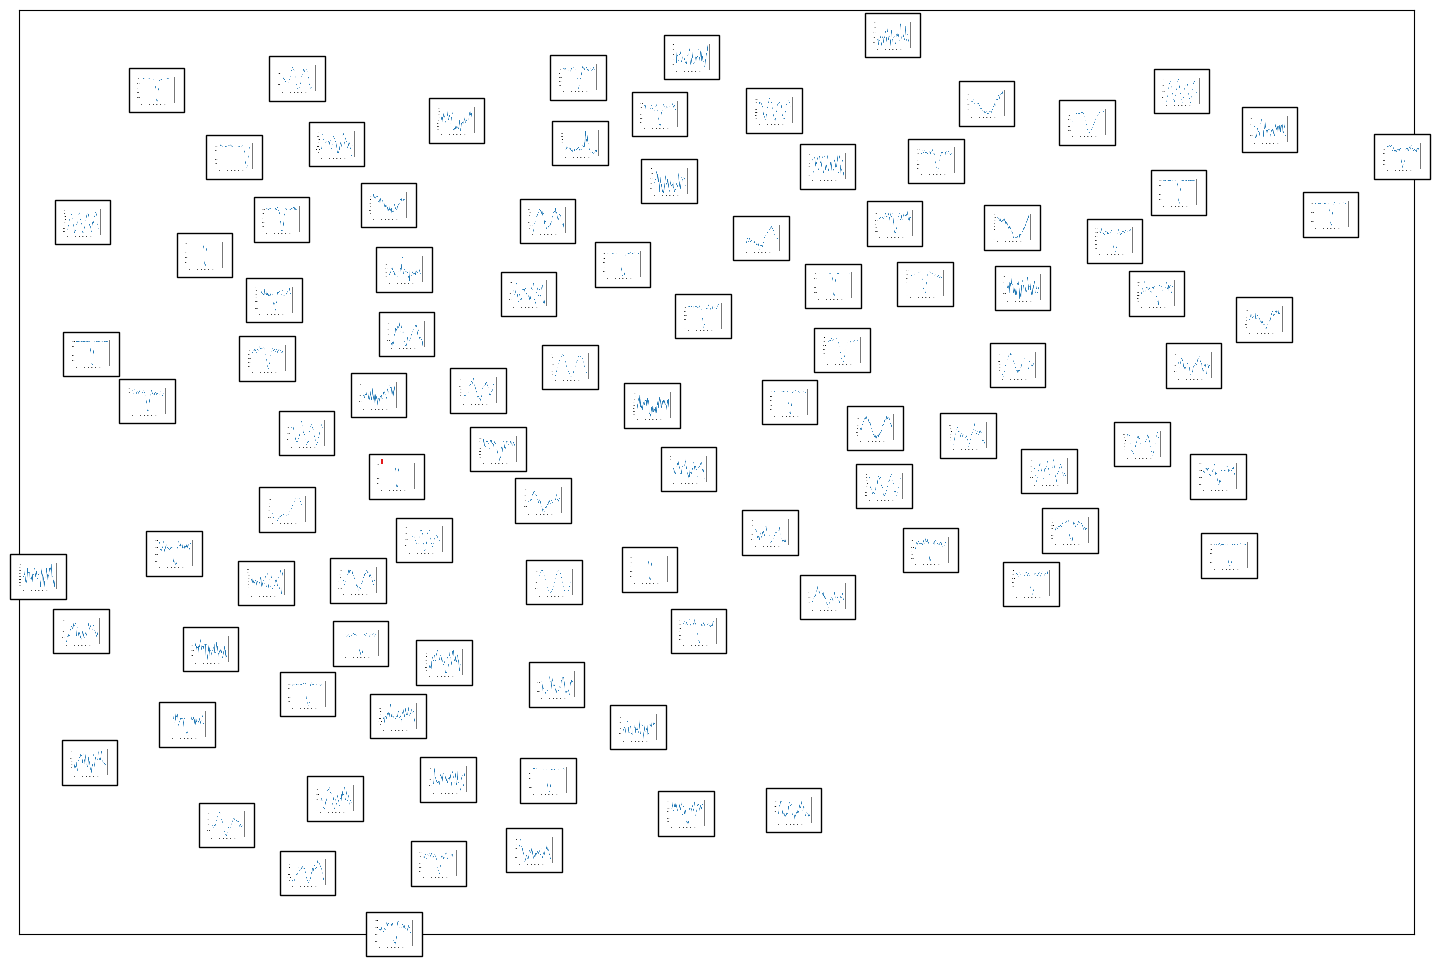

In [304]:
### Run Tsne embedding and plot 
plt.clf
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne
#                "t-SNE embedding of the digits (time %.2fs)" %
#                (time() - t0)
              )
plt.show()